In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('04022021230051.csv', index_col=False)

In [3]:
def fix_data(df, default_buffer_size):
    columns = ['size', 'numberQueries', 'keyDistribution', 'valueDistribution',
       'snappy_read_times', 'simd_read_times', 'rle_read_times',
       'zlib_read_times', 'zstandard_read_times', 'uncompressed_read_times',
       'snappy_load_times', 'simd_load_times', 'rle_load_times',
       'zlib_load_times', 'zstandard_load_times', 'uncompressed_load_times',
       'snappy_sizes', 'simd_sizes', 'rle_sizes', 'zlib_sizes',
       'zstandard_sizes', 'uncompressed_sizes', 'readPercentage']
    readPercentage = []
    snappy_ratio = []
    simd_ratio = []
    rle_ratio = []
    zlib_ratio = []
    zstandard_ratio = []
    default_buffer_sizes = []
    
    for row in range(len(df)):
        if row % 2 == 0:
            readPercentage.append(100)
        else:
            readPercentage.append(50)
        
        default_buffer_sizes.append(default_buffer_size)
    
    size = df['size']
    numberQueries = df['numberQueries']
    keyDistribution = df['keyDistribution']
    valueDistribution = df['valueDistribution']
    snappy_read_times = df['snappy_read_times']
    simd_read_times = df['simd_read_times']
    rle_read_times = df['rle_read_times']
    zlib_read_times = df['zlib_read_times']
    zstandard_read_times = df['zstandard_read_timesuncompressed_read_times']
    uncompressed_read_times = df['snappy_load_times']
    snappy_load_times = df['simd_load_times']
    simd_load_times = df['rle_load_times']
    rle_load_times = df['zlib_load_times']
    zlib_load_times = df['zstandard_load_times']
    zstandard_load_times = df['uncompressed_load_times']
    uncompressed_load_times = df['snappy_sizes']
    snappy_sizes = df['simd_sizes']
    simd_sizes = df['rle_sizes']
    rle_sizes = df['zlib_sizes']
    zlib_sizes = df['zstandard_sizes']
    zstandard_sizes = df['uncompressed_sizes']
    uncompressed_sizes = df['readPercentage']
    
    data = zip(size, numberQueries, keyDistribution, valueDistribution, 
              snappy_read_times, simd_read_times, rle_read_times, zlib_read_times, zstandard_read_times, uncompressed_read_times,
              snappy_load_times, simd_load_times, rle_load_times, zlib_load_times, zstandard_load_times, uncompressed_load_times,
              snappy_sizes, simd_sizes, rle_sizes, zlib_sizes, zstandard_sizes, uncompressed_sizes, readPercentage)
    
    
    new_df = pd.DataFrame(data, columns = columns)
    
    snappy_ratio = []
    simd_ratio = []
    rle_ratio = []
    zlib_ratio = []
    zstandard_ratio = []
    default_buffer_sizes = []
    
    for row in range(len(new_df)):
        default_buffer_sizes.append(default_buffer_size)
        # Compute the ratios
        uncompressed_size = new_df.iloc[row].uncompressed_sizes
        
        if uncompressed_size != 0:
            sizes = new_df.iloc[row]
            snappy_ratio.append(sizes['snappy_sizes'] / uncompressed_size)
            simd_ratio.append(sizes['simd_sizes'] / uncompressed_size)
            rle_ratio.append(sizes['rle_sizes'] / uncompressed_size)
            zlib_ratio.append(sizes['zlib_sizes'] / uncompressed_size)
            zstandard_ratio.append(sizes['zstandard_sizes'] / uncompressed_size)
        else:
            snappy_ratio.append(1)
            simd_ratio.append(1)
            rle_ratio.append(1)
            zlib_ratio.append(1)
            zstandard_ratio.append(1)
    
    columns = ['size', 'numberQueries', 'keyDistribution', 'valueDistribution',
       'snappy_read_times', 'simd_read_times', 'rle_read_times',
       'zlib_read_times', 'zstandard_read_times', 'uncompressed_read_times',
       'snappy_load_times', 'simd_load_times', 'rle_load_times',
       'zlib_load_times', 'zstandard_load_times', 'uncompressed_load_times',
       'snappy_sizes', 'simd_sizes', 'rle_sizes', 'zlib_sizes',
       'zstandard_sizes', 'uncompressed_sizes', 'readPercentage', 
        'snappy_ratios', 'simd_ratios', 'rle_ratios', 'zlib_ratios', 'zstandard_ratios', 'default_buffer_sizes']
    data = zip(size, numberQueries, keyDistribution, valueDistribution, 
          snappy_read_times, simd_read_times, rle_read_times, zlib_read_times, zstandard_read_times, uncompressed_read_times,
          snappy_load_times, simd_load_times, rle_load_times, zlib_load_times, zstandard_load_times, uncompressed_load_times,
          snappy_sizes, simd_sizes, rle_sizes, zlib_sizes, zstandard_sizes, uncompressed_sizes, readPercentage, 
            snappy_ratio, simd_ratio, rle_ratio, zlib_ratio, zstandard_ratio, default_buffer_sizes)
    
    new_df = pd.DataFrame(data, columns = columns)
    
    return new_df

In [4]:
df = fix_data(df, 16384)
df

,size,numberQueries,keyDistribution,valueDistribution,snappy_read_times,simd_read_times,rle_read_times,zlib_read_times,zstandard_read_times,uncompressed_read_times,...,zlib_sizes,zstandard_sizes,uncompressed_sizes,readPercentage,snappy_ratios,simd_ratios,rle_ratios,zlib_ratios,zstandard_ratios,default_buffer_sizes
0,10000,10000,0,0,0.034461,0.034463,0.034516,0.034460,0.035077,0.034422,...,0,0,0,100,1.000000,1.000000,1.000000,1.000000,1.000000,16384
1,10000,10000,0,1,0.021817,0.021823,0.022220,0.021955,0.021848,0.021798,...,0,0,0,50,1.000000,1.000000,1.000000,1.000000,1.000000,16384
2,10000,10000,1,0,0.034760,0.034719,0.034733,0.034724,0.035270,0.034709,...,0,0,0,100,1.000000,1.000000,1.000000,1.000000,1.000000,16384
3,10000,10000,1,1,0.022103,0.022377,0.022120,0.022102,0.022290,0.022225,...,0,0,0,50,1.000000,1.000000,1.000000,1.000000,1.000000,16384
4,10000,10000,2,0,0.034796,0.034903,0.034706,0.034784,0.034708,0.034758,...,0,0,0,100,1.000000,1.000000,1.000000,1.000000,1.000000,16384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3208872,10000,1,1,4.226610,4.210180,4.134480,7.872340,5.199620,3.784590,...,31381049,61274476,90701824,50,0.999957,0.033416,0.000061,0.345980,0.675559,16384
596,3208872,10000,2,0,8.310680,8.546460,8.358530,20.087300,11.820700,7.619060,...,85469469,88591984,90570752,100,0.999966,1.002075,1.000000,0.943676,0.978152,16384
597,3208872,10000,2,0,4.028630,4.273150,4.114710,9.984170,5.798980,3.729230,...,85594102,88720926,90701824,50,0.999983,1.002075,1.000000,0.943687,0.978160,16384
598,3208872,10000,2,1,7.862850,9.035250,8.272390,19.887700,11.902900,7.644740,...,57126296,83588045,90570752,100,0.999931,0.382337,1.000000,0.630737,0.922903,16384


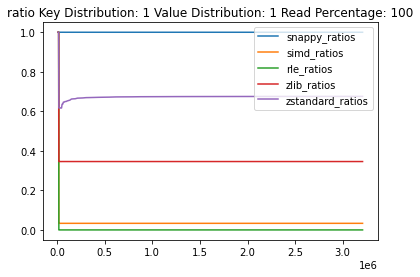

In [5]:
from collections import defaultdict 

def plot(df, keyDistribution, valueDistribution, readPercentage, mode):
    columns = None
    y_val = None
    title = mode + ' Key Distribution: ' + str(keyDistribution) + ' Value Distribution: ' + str(valueDistribution) + ' Read Percentage: ' + str(readPercentage)
    
    if mode == 'read':
        columns = ['snappy_read_times', 'simd_read_times', 'rle_read_times', 'zlib_read_times', 
                   'zstandard_read_times', 'uncompressed_read_times']
        y_val = 'Latency (Seconds)'
    elif mode == 'load':
        columns = ['snappy_load_times', 'simd_load_times', 'rle_load_times', 'zlib_load_times', 
                   'zstandard_load_times', 'uncompressed_load_times']
        y_val = 'Latency (Seconds)'
    elif mode == 'ratio':
        columns = ['snappy_ratios', 'simd_ratios', 'rle_ratios', 'zlib_ratios', 
                   'zstandard_ratios']
        y_val = 'Ratio'
    elif mode == 'sizes':
        columns = ['snappy_sizes', 'simd_sizes', 'rle_sizes', 'zlib_sizes',
                  'zstandard_sizes', 'uncompressed_sizes']
        y_val = 'Latency (Seconds)'
    
    
    filtered_df = df[(df['keyDistribution'] == keyDistribution) & (df['valueDistribution'] == valueDistribution) & 
                     (df['readPercentage'] == readPercentage)]
    
    plot_data = defaultdict(None)
    for col in columns:
        plot_data[col] = list(filtered_df[col])
    
    plot_df = pd.DataFrame(plot_data, index=list(filtered_df['size']))
    lines = plot_df.plot.line(title=title)
    
    return None

plot(df, 1, 1, 100, 'ratio')

In [11]:
### Machine Learning --> can we predict compression ratio R based on the keyDistribution, valueDistribution, size
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

def create_ml_data(df, compression_type):
    columns = ['keyDistribution', 'valueDistribution', 'size', 'numberQueries']
    X = df[columns].to_numpy()
    y = df[[compression_type]].to_numpy()
    
    return X,y

def crossFoldValidation(X, y, model):
    cv_results = cross_validate(model, X, y, cv=5)

    return cv_results

def linear_regression(X, y):
    return LinearRegression().fit(X, y)

def random_forest(X, y):
    return RandomForestRegressor(max_depth=10, random_state=0).fit(X, y)

def mlp_regressor(X, y):
    return MLPRegressor(random_state=1, max_iter=500).fit(X, y)

def run_ml(df, compression_scheme):
    X, y = create_ml_data(df, compression_scheme)
    linreg = linear_regression(X, y)
    rf = random_forest(X, y)
    mlp = mlp_regressor(X, y)
    
    print("Linear Regression CV Scores: ", crossFoldValidation(X, y, linreg)['test_score'])
    print("Random Forest CV Scores: ", crossFoldValidation(X, y, rf))
    print("MLP Regressor CV Scores: ", crossFoldValidation(X, y, mlp))

run_ml(df, 'snappy_ratios')
# run_ml(df, 'simd_ratios')
# run_ml(df, 'rle_ratios')
# run_ml(df, 'zlib_ratios')
# run_ml(df, 'zstandard_ratios')

<ipython-input-11-473961dfea60>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return RandomForestRegressor(max_depth=10, random_state=0).fit(X, y)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Linear Regression CV Scores:  [ -0.11435061  -2.10668506  -3.46410122  -4.29492359 -36.02080153]


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataCon

Random Forest CV Scores:  {'fit_time': array([0.14900494, 0.22874999, 0.15850306, 0.14955401, 0.11973691]), 'score_time': array([0.00704503, 0.00990105, 0.00663495, 0.00709105, 0.00611901]), 'test_score': array([-0.56380018,  0.41801778, -0.29495541, -1.57881799, -1.24784393])}


/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayant/miniconda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

MLP Regressor CV Scores:  {'fit_time': array([0.33909392, 0.54158688, 0.17367506, 0.4329102 , 0.75708103]), 'score_time': array([0.00051689, 0.00052285, 0.00051713, 0.00063586, 0.00051904]), 'test_score': array([-2.04782797e+14, -2.28848032e+12, -1.31583032e+15, -2.60681259e+12,
       -4.26882077e+15])}
